In [ ]:
# ART 350 Datavis / Datanarratives 2021
# Final project
#
# Visualization of particulate matter measurements from PurpleAir sensors in the San Francisco Bay Area 2019 and 2020
# Data sourced directly from sensors in the San Francisco Bay Area and curated on the Air Watch Bay Area platform.
# In consultation with AirWatch
# Check assignment deliverables on UBlearns -------------------------------------

**Overview of your final project results**

Here you describe which data files and which parameters you investigated. You describe the graphs you produced and what they reveal. Include questions you can formulate based on the results of the visualizations.

200 words min

250 words max

**Jupyter Notebook **

The code blocks below give you all the tools you need for the assignment.
Make your additions / changes in the code or add new modules as you like.
When you have completed the  assignment as described in the outline document (see UBlearns), you will have coded blocks that create at least the following graphs:

- Time series plots from two or more locations in the study area.
- Graph or histogram of the combined sensor data from all locations.
- Graphs or maps of sensor readings before and after the wildfires. 


In [ ]:
# overview of sensor devices in Benicia active during 2019
BeniciaDevices = 'benicia_devices.csv'

# subset of 2019 data filtered by location
BeniciaMiddleSchool = 'Benicia_Middle_School_1_2019.csv'
BeniciaRankin = 'Benicia_Rankin_2019.csv'
DAL = 'DAL16_2019.csv'
ElBonito = 'El_Bonito_2019.csv'
BeniciaShannon = 'Benicia_Shannon_2019.csv'
BeniciaSkillmanPark = 'Benicia_Skillman_Park_2019.csv'

# data filtered by time
WeekAfterWildfires = 'week_after_wildfires_2020.csv'
WeekBeforeWildfires = 'week_before_wildfires_2020.csv'

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

#select a data source
source = BeniciaRankin
data = pandas.read_csv("https://raw.githubusercontent.com/realtechsupport/DataNarratives/master/AirWatch/" + source)

In [ ]:
#convert to datetime object and check the categories
data['time'] = pandas.to_datetime(data['time'], format = '%Y-%m-%d %H:%M:%S', utc=True)
data['time'] = data['time'].dt.tz_localize(None)
data.head()

time           label  PM2.5  ...      id   latitude   longitude
0 2019-01-01 07:53:30  Benicia Rankin   0.33  ...  3765.0  38.060789 -122.149458
1 2019-01-01 07:54:50  Benicia Rankin   0.33  ...  3765.0  38.060789 -122.149458
2 2019-01-01 07:56:10  Benicia Rankin   0.33  ...  3765.0  38.060789 -122.149458
3 2019-01-01 07:57:30  Benicia Rankin   0.33  ...  3765.0  38.060789 -122.149458
4 2019-01-01 07:58:50  Benicia Rankin   0.33  ...  3765.0  38.060789 -122.149458

[5 rows x 9 columns]

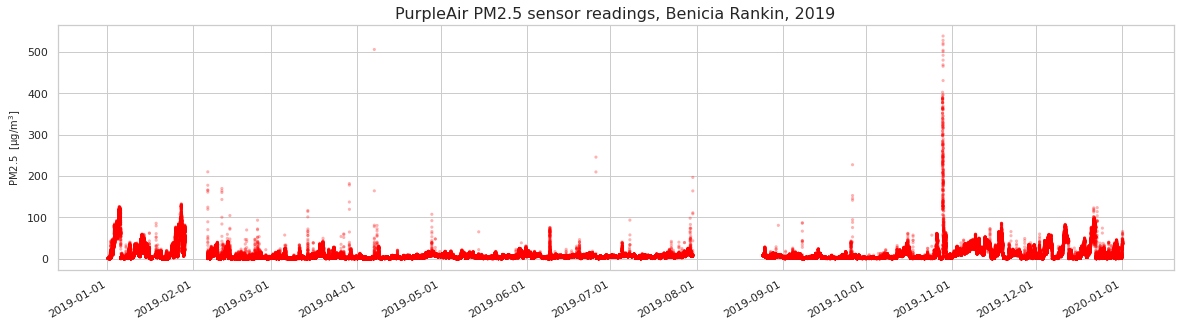

In [ ]:
#https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy
import seaborn

seaborn.set_theme(style="whitegrid")

width = 20; height = 5; scale = 10; alpha = 0.3
fig, ax = plt.subplots(figsize = (width, height))

x1 = data['time']
y1 = data['PM2.5']
color = 'red'
ax.scatter(x1, y1, c=color, s=scale, alpha=0.3, edgecolors='none')

# use a more precise date string for the x axis locations in the toolbar.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

# set major ticks every month.
fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)

# title and y axis
location = data['label'][0]
ax.set_title('PurpleAir PM2.5 sensor readings, ' + location + ', 2019', fontsize = 16)
ax.set_ylabel('PM2.5  [µg/m$^3$]', fontsize = 10)

# rotate and align the tick labels
fig.autofmt_xdate()

plt.show()

In [ ]:
! pip install bokeh
! pip install selenium

In [ ]:
# use the same data for an interactive bokeh display
import pandas
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models.annotations import Title

output_notebook()

#select a data source and convert the datetime
BeniciaRankin = 'Benicia_Rankin_2019.csv'
source = BeniciaRankin
data = pandas.read_csv("https://raw.githubusercontent.com/realtechsupport/DataNarratives/master/AirWatch/" + source)

#convert to datetime object 
data['time'] = pandas.to_datetime(data['time'], format = '%Y-%m-%d %H:%M:%S', utc=True)
data['time'] = data['time'].dt.tz_localize(None)
#-------------------------------------------------------------------------------

alpha = 0.3
x1 = data['time']
y1 = data['PM2.5']

#define some useful tools
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(tools=TOOLS)

# create a plot with a datetime axis type
p = figure(plot_width=1200, plot_height=600, x_axis_type="datetime", tools=TOOLS)
p.scatter(x1, y1, alpha=alpha, line_color='none')

# title and y axis
t = Title()
location = data['label'][0]
t.text = 'PurpleAir PM2.5 sensor readings, ' + location + ', 2019'
p.title = t
p.title.align = 'center'
p.yaxis.axis_label = 'PM2.5  [µg/m$^3$]'

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "line_color" value "none" [renderer: GlyphRenderer(id='1656', ...)]


In [ ]:
source = WeekBeforeWildfires
beforewildfiredata = pandas.read_csv("https://raw.githubusercontent.com/realtechsupport/DataNarratives/master/AirWatch/" + source)
beforewildfiredata.head()

time       label  PM2.5  ...       id   latitude   longitude
0  2020-09-01 00:54:31-07:00  Benicia BB  25.60  ...  43787.0  38.065944 -122.179825
1  2020-09-01 00:56:31-07:00  Benicia BB  25.42  ...  43787.0  38.065944 -122.179825
2  2020-09-01 00:58:31-07:00  Benicia BB  28.43  ...  43787.0  38.065944 -122.179825
3  2020-09-01 01:00:31-07:00  Benicia BB  29.55  ...  43787.0  38.065944 -122.179825
4  2020-09-01 01:02:31-07:00  Benicia BB  28.67  ...  43787.0  38.065944 -122.179825

[5 rows x 9 columns]

In [ ]:
source = WeekAfterWildfires
afterwildfiredata = pandas.read_csv("https://raw.githubusercontent.com/realtechsupport/DataNarratives/master/AirWatch/" + source)
afterwildfiredata.head()

time       label  PM2.5  ...     id   latitude   longitude
0  2020-09-15 00:54:35-07:00  Benicia BB  55.86  ...  43787  38.065944 -122.179825
1  2020-09-15 00:56:34-07:00  Benicia BB  52.59  ...  43787  38.065944 -122.179825
2  2020-09-15 00:58:35-07:00  Benicia BB  54.75  ...  43787  38.065944 -122.179825
3  2020-09-15 01:00:35-07:00  Benicia BB  57.30  ...  43787  38.065944 -122.179825
4  2020-09-15 01:02:35-07:00  Benicia BB  54.21  ...  43787  38.065944 -122.179825

[5 rows x 9 columns]

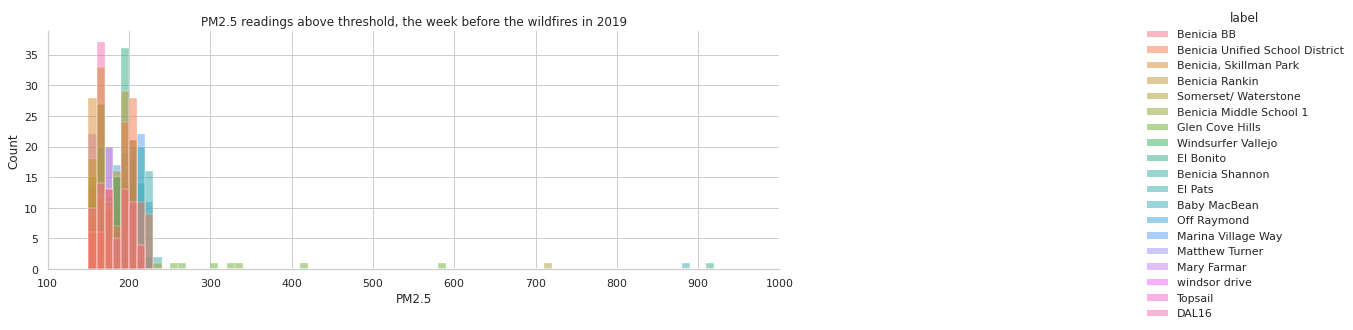

In [ ]:
import matplotlib.pyplot as plt
import seaborn 

threshold = 150
temp_b = beforewildfiredata[beforewildfiredata['PM2.5'] > threshold]

g = seaborn.displot(temp_b, x='PM2.5', hue='label', binwidth = 10)
g.fig.set_figwidth(20)
g.fig.set_figheight(4)

plt.xlim(100, 1000)
plt.title('PM2.5 readings above threshold, the week before the wildfires in 2019')
plt.show()


In [ ]:
# packages for mapping
!apt-get install libproj-dev proj-bin proj-data
!apt-get install libgeos-dev

# shapely needs to be reinstalled to use the same geos install as cartopy (https://github.com/SciTools/cartopy/issues/871)
!pip uninstall -y shapely
!pip install --no-binary shapely shapely
!pip install cartopy

!pip install geopandas
!pip install geoplot

In [ ]:
import geopandas
import geoplot 
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import pandas
import seaborn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
source = BeniciaDevices
devicesdata = pandas.read_csv("https://raw.githubusercontent.com/realtechsupport/DataNarratives/master/AirWatch/" + source)

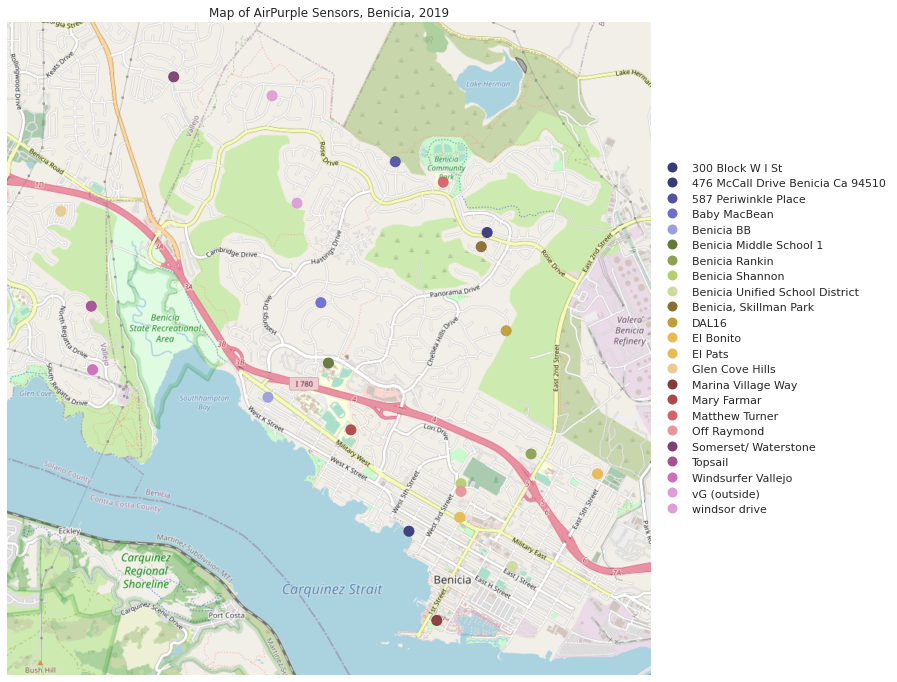

In [ ]:
ddata = geopandas.GeoDataFrame(devicesdata, geometry=geopandas.points_from_xy(devicesdata.longitude, devicesdata.latitude))

ax = geoplot.polyplot(ddata, projection=gcrs.WebMercator(),edgecolor='white', facecolor='lightgray',figsize=(12, 12))
geoplot.pointplot(ddata, s=10,  alpha=0.95, hue='label', legend=True,  cmap='tab20b', legend_kwargs={'bbox_to_anchor': (1, 0.8), 'frameon': False}, ax=ax)
geoplot.webmap(ddata, ax=ax)
plt.title('Map of AirPurple Sensors, Benicia, 2019')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


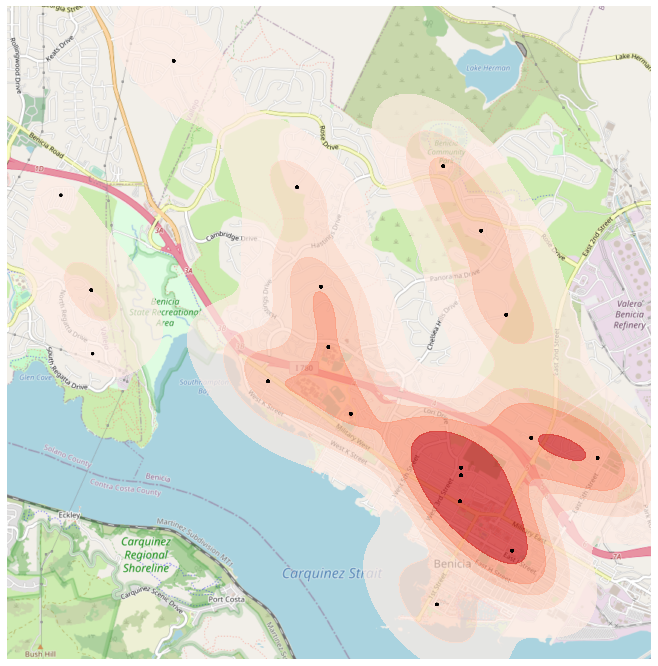

In [ ]:
#week before the wildfires - display density of measurements above a set threshold

threshold = 150

beforewildfiredata_th = beforewildfiredata[beforewildfiredata['PM2.5'] > threshold]
bwdata_th = geopandas.GeoDataFrame(beforewildfiredata_th, geometry=geopandas.points_from_xy(beforewildfiredata_th.longitude, beforewildfiredata_th.latitude))

ax = geoplot.kdeplot(bwdata_th, projection=gcrs.WebMercator(), figsize=(12,12), shade=True, cmap='Reds', shade_lowest=False, n_levels = 6, alpha=0.7) #, cbar=True)
geoplot.pointplot(bwdata_th, s=2, color='black', alpha=0.5, ax=ax)
geoplot.webmap(bwdata_th, ax=ax)

plt.show()